In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import datetime
%matplotlib inline
from sklearn import model_selection
from sklearn import model_selection, preprocessing
import datetime
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


sb_train = pd.read_csv('train.csv')
sb_test = pd.read_csv('test.csv')

In [204]:
!pip install xgboost
import xgboost as xgb

# Part 1 #

In the first step, we will create a new data frame in which all the values are sorted by timestamp

In [205]:
sb_train_timesort = sb_train.sort_values(by=['timestamp'], ascending=False)
sb_train_timesort

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000


change all categorial values into int

In [206]:

for c in sb_train_timesort.columns:
    if  sb_train_timesort[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(sb_train_timesort[c].values)) 
        sb_train_timesort[c] = lbl.transform(list(sb_train_timesort[c].values))
        
sb_train_timesort        


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30470,30473,1160,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000
30469,30472,1160,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30468,30471,1160,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30467,30470,1160,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30466,30469,1160,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
3,4,3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
2,3,2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
1,2,1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000


In [207]:
if 'object' in sb_train_timesort.dtypes.values:
    print('The DataFrame contains a string variable.')
else:
    print('The DataFrame does not contain a string variable.')

The DataFrame does not contain a string variable.


At first, we replaced all missing values with the median

In [208]:
medians = sb_train_timesort.median()
sb_train_timesort = sb_train_timesort.fillna(medians)
sb_train_timesort

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30470,30473,1160,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000
30469,30472,1160,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30468,30471,1160,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30467,30470,1160,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30466,30469,1160,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,4,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16331452
3,4,3,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,13100000
2,3,2,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,5700000
1,2,1,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,6000000


### Basic model with sorted timestamp ###

In the next step we will do k fold cross validation, The data is then divided into k "folds", or chunks, where k is specified by the value of the k_fold variable. The data is split such that each fold has roughly the same number of samples. For each iteration of the loop, one of the folds is set aside as the test set, while the remaining folds are combined to form the training set. The decision tree is fit on the training set, and the model's performance is evaluated on the test set by calculating the R^2 score, which measures the proportion of the variance in the target variable that is explained by the model. The R^2 scores for each iteration are stored in an array called arr_r2.

In [209]:
def k_fold_cross_validation_single_tree(x, y, k_fold, max_depth):
    """

    :param x:
    :param y:
    :param k_fold: the number of particions of the data, number of simulations
    :param k_nearest: number of neighbors
    :return: mean mse from simulations
    """
    dtr = DecisionTreeRegressor(max_depth= max_depth, min_samples_leaf=0.01, random_state=1)
    chunk_size = len(x)//k_fold
    arr_r2 = np.zeros(k_fold)
  
    for i in range(k_fold):
        ##spliting the fata for one value of max depth
        x_test = x[i*chunk_size:(i+1)*chunk_size] 
        y_test = y[i*chunk_size:(i+1)*chunk_size]
        x_train = np.vstack((x[:i*chunk_size], x[(i+1)*chunk_size:]))
        y_train = np.hstack((y[:i*chunk_size], y[(i+1)*chunk_size:]))
        ##
        dtr.fit(x_train, y_train)
        y_pred = dtr.predict(x_test)
        r_score = r2_score(y_pred,y_test)
        arr_r2[i] =  r_score
    mean_r2 = np.mean( arr_r2)
    return mean_r2

the next function is finding the best value for a single parameter (the maximum depth of a decision tree) by using k-fold cross-validation. It does this by training a decision tree model with each possible value of the parameter, evaluating the model's performance using k-fold cross-validation, and selecting the value that results in the highest mean r2 score.

In [210]:
def finding_best_parameter_by_cv(x, y, k_fold,list_of_params):
    

    arr_score = np.zeros(len(list_of_params))
    for i in range(len(list_of_params)):
        score = k_fold_cross_validation_single_tree(x, y, k_fold, list_of_params[i])
        arr_score[i] = score
        
    d = {x: y for x,y in zip(list_of_params, arr_score)}
    print(d)
    
    return list_of_params[np.argmax(arr_score)]


In [211]:
y = sb_train_timesort['price_doc'].values #target variable 
x = sb_train_timesort.drop('price_doc', axis=1) #we removed all the columns that contain string variable + target variable

optimal_depth = finding_best_parameter_by_cv(x.values, y, 10, [3,5,7,8,9,10,11,12,13,14])
optimal_depth

{3: -0.14654381459959867, 5: 0.09032167237605149, 7: 0.139800291686285, 8: 0.15129620365385704, 9: 0.1546853249363093, 10: 0.15594061252806277, 11: 0.15643201894633021, 12: 0.15657105703080088, 13: 0.1565847801203863, 14: 0.1565847801203863}


13

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

dtr = DecisionTreeRegressor(max_depth= optimal_depth, min_samples_leaf=0.0001, random_state=1)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

r_score = r2_score(y_pred,y_test)
r_score


0.45547642895370355

### Random forest ###

In [213]:
# Step 1: Instantiate a random forest regressor
Model = RandomForestRegressor(n_estimators = 30, 
                              random_state = 1, 
                              oob_score = True, 
                              max_features = 20,
                              min_samples_leaf = 8)

In [214]:
Model.fit(X = x_train, y = y_train)
y_pred = Model.predict(X = x_train)
r_score = r2_score(y_pred,y_train)
r_score

0.5134022495686354

### runing the basic model without sort by time ###

In [215]:
sb_train = pd.read_csv('train.csv')
sb_test = pd.read_csv('test.csv')

In [216]:
#change all categorial values into int
for c in sb_train.columns:
    if  sb_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(sb_train[c].values)) 
        sb_train[c] = lbl.transform(list(sb_train[c].values))
        
sb_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,1160,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,1160,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,1160,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,1160,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [217]:
if 'object' in sb_train.dtypes.values:
    print('The DataFrame contains a string variable.')
else:
    print('The DataFrame does not contain a string variable.')

The DataFrame does not contain a string variable.


In [218]:
medians = sb_train.median()
sb_train = sb_train.fillna(medians)
sb_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,0,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,1,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,3,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,4,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,1160,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,1160,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,1160,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,1160,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [219]:
y = sb_train['price_doc'].values #target variable 
x = sb_train.drop('price_doc', axis=1) #we removed all the columns that contain string variable + target variable

optimal_depth = finding_best_parameter_by_cv(x.values, y, 10, [3,5,7,8,9,10,11,12,13,14])
optimal_depth

{3: -0.1459907964904312, 5: 0.09070379943439973, 7: 0.14109430669007944, 8: 0.15257958869418267, 9: 0.1557839414981051, 10: 0.15697950137660308, 11: 0.1575132872778657, 12: 0.1577466948356448, 13: 0.1577466948356448, 14: 0.1577466948356448}


12

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

dtr = DecisionTreeRegressor(max_depth= optimal_depth, min_samples_leaf=0.0001, random_state=1)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

r_score = r2_score(y_pred,y_test)
r_score


0.5307788043658125

### random forest ###

In [221]:
# Step 1: Instantiate a random forest regressor
Model = RandomForestRegressor(n_estimators = 30, 
                              random_state = 1, 
                              oob_score = True, 
                              max_features = 20,
                              min_samples_leaf = 8)

In [222]:
Model.fit(X = x_train, y = y_train)
y_pred = Model.predict(X = x_train)
r_score = r2_score(y_pred,y_train)
r_score

0.5207249752890276

It can be seen that the result of the model improved after sorting the values.
The reason for this may be because the sorting of the information may reduce the noise arising from the data, and may improve the distribution of the information and thus make the model learn the data more easily.

# Part 2 #

In [223]:
sb_train = pd.read_csv('train.csv')
sb_test = pd.read_csv('test.csv')

In [224]:
#change all NA to median
medians =  sb_train.median()
sb_train = sb_train.fillna(medians)

#Choose the Poselenie Sosenskoe sub_area
sb_train = sb_train.loc[sb_train["sub_area"] == "Poselenie Sosenskoe"]

C:\Users\liadz\AppData\Local\Temp\ipykernel_1448\379759933.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians =  sb_train.median()


In [225]:
#calculate price per full_sq
sb_train["price/full_sq"] = sb_train["price_doc"] / sb_train["full_sq"]

#remove all rows with full_sq = 0 so price/full_sq won't be inf
sb_train = sb_train[sb_train["full_sq"] > 0]

#create 4 categories for price/full_sq
labels = ['q1', 'q2', 'q3' , 'q4']
sb_train['percentile'] = pd.qcut(sb_train["price/full_sq"], q=[0, 0.25, 0.5, 0.75 , 1], labels=labels)

y = sb_train['percentile']


In [226]:
#change all categorial values into integers to fit the model
for c in sb_train.columns:
    if  sb_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(sb_train[c].values)) 
        sb_train[c] = lbl.transform(list(sb_train[c].values))


In [227]:
# Select the features and target columns
X = sb_train.drop(['percentile' , 'price_doc' , 'price/full_sq'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [228]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [229]:
# Evaluate the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6910112359550562


In [230]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[72 16  3  1]
 [12 52 14  0]
 [ 0 11 44 31]
 [ 3  3 16 78]]


In [231]:
#Calculating the precision-recall for each of the categories
for i in range(4):
    precision = cm[i][i] / sum(cm[j][i] for j in range(4))
    recall = cm[i][i] / sum(cm[i][j] for j in range(4))
    print("Precision for class q{}: {:.2f}".format(i+1, precision))
    print("Recall for class q{}: {:.2f}".format(i+1, recall))

Precision for class q1: 0.83
Recall for class q1: 0.78
Precision for class q2: 0.63
Recall for class q2: 0.67
Precision for class q3: 0.57
Recall for class q3: 0.51
Precision for class q4: 0.71
Recall for class q4: 0.78


# Part 3

In [232]:
sb_train = pd.read_csv('train.csv')
sb_test = pd.read_csv('test.csv')

# Xgboost first model 

In [233]:


y_train = sb_train["price_doc"]
x_train = sb_train.drop(["id", "timestamp", "price_doc"], axis=1)
x_test = sb_test.drop(["id", "timestamp"], axis=1)

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=100, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)
#cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[20:30:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:30:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:30:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objecti

Checking the most important featurs

<AxesSubplot:xlabel='features', ylabel='importance'>

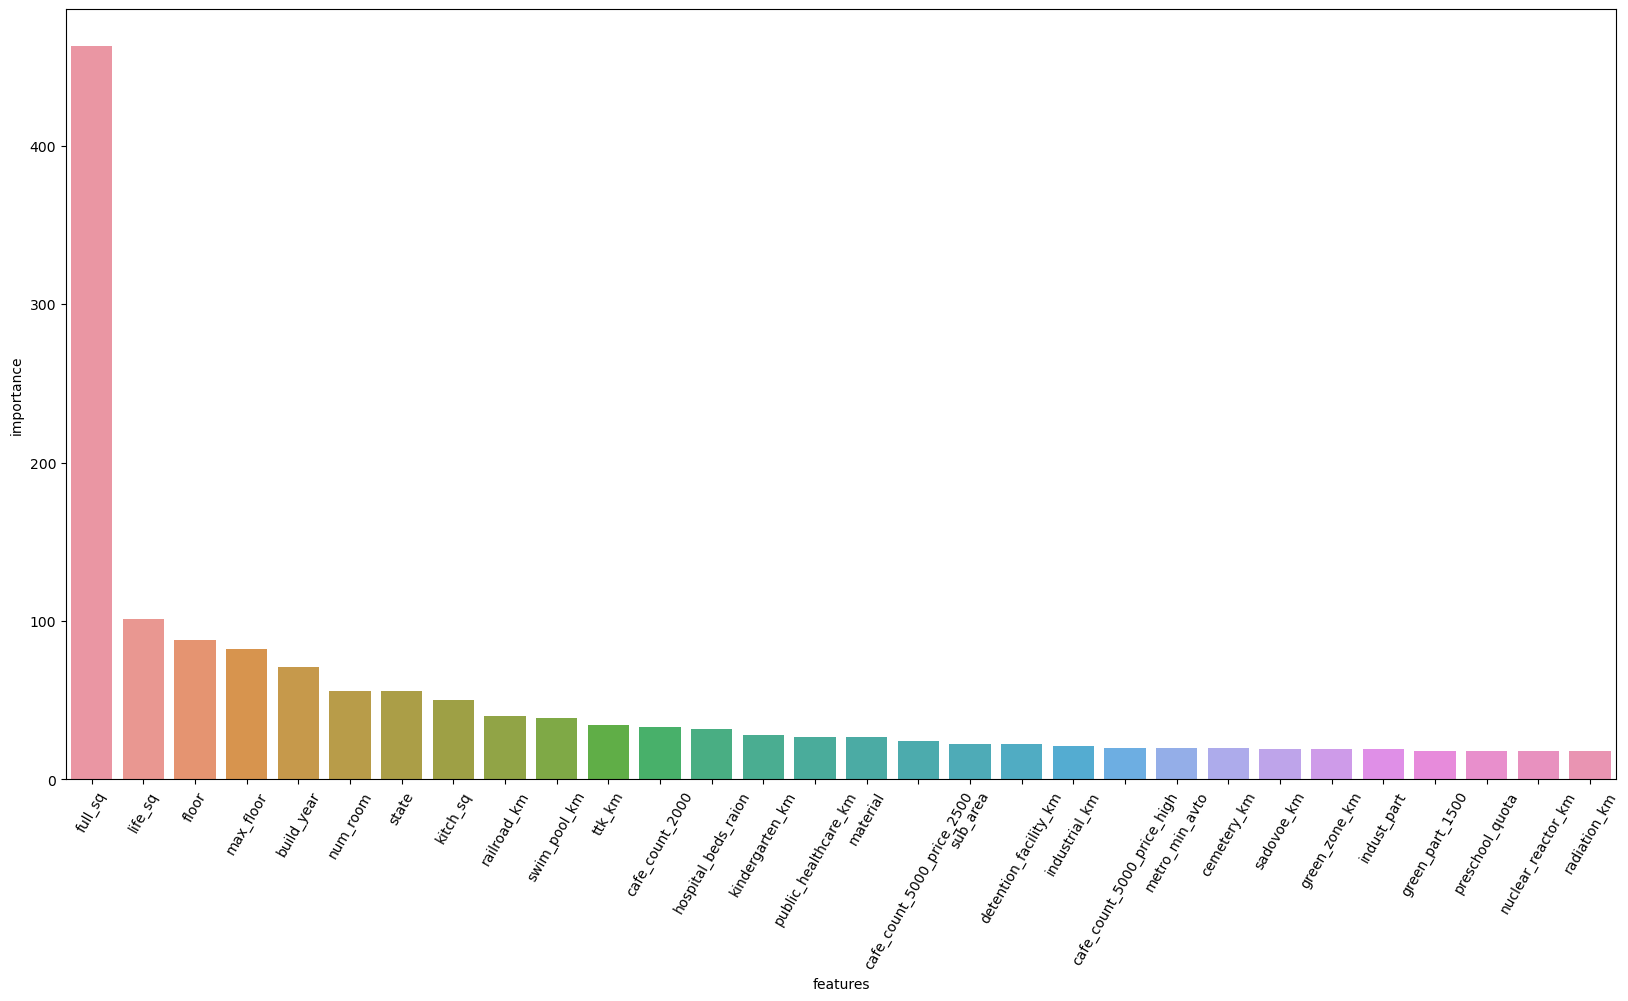

In [234]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=60)
sns.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")

Kfold cross validation

In [235]:
# Split the data into K folds
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)



# Initialize the cross-validation score
cv_score = 0

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}



#x_train['year_category'] = x_train['year_category'].astype('category') # set categorical dtype
r2_scores = []

for i, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"Fold {i+1}/{K}")
    xgb_train = xgb.DMatrix(x_train.iloc[train_index], label=y_train.iloc[train_index], enable_categorical=True)
    xgb_val = xgb.DMatrix(x_train.iloc[val_index], label=y_train.iloc[val_index], enable_categorical=True)
    watchlist = [(xgb_train, 'train'), (xgb_val, 'val')]
    xgb_model = xgb.train(xgb_params, xgb_train, num_boost_round=num_boost_rounds, evals=watchlist, verbose_eval=50)
    # get predictions on validation set
    y_pred = xgb_model.predict(xgb_val)
    score = r2_score(y_train.iloc[val_index], y_pred)
    print(f"Fold {i+1} R2 score: {score:.4f}")
    r2_scores.append(score)
    
mean_r2 = np.mean(r2_scores)
print(f"Mean R2 score: {mean_r2:.4f}")   


Fold 1/5
[20:30:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:8241567.95029	val-rmse:8049630.82689
[50]	train-rmse:2598213.73763	val-rmse:2745606.30891
[99]	train-rmse:2267213.03653	val-rmse:2545838.61933
Fold 1 R2 score: 0.6971
Fold 2/5
[20:30:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/lea

In [236]:
id_test = sb_test.id
y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

,id,price_doc
0,30474,5352007.0
1,30475,8005795.0
2,30476,5635200.0
3,30477,5481939.5
4,30478,5091758.5


In [237]:
output.to_csv('xgb.csv', index=False)

### now we will do some improvments and runf the model again ###

In [238]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

magic numbers

In [239]:
id_test = test.id
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])

rate_2015_q2 = 1
rate_2015_q1 = rate_2015_q2 / 0.9932
rate_2014_q4 = rate_2015_q1 / 1.0112
rate_2014_q3 = rate_2014_q4 / 1.0169
rate_2014_q2 = rate_2014_q3 / 1.0086
rate_2014_q1 = rate_2014_q2 / 1.0126
rate_2013_q4 = rate_2014_q1 / 0.9902
rate_2013_q3 = rate_2013_q4 / 1.0041
rate_2013_q2 = rate_2013_q3 / 1.0044
rate_2013_q1 = rate_2013_q2 / 1.0104  # This is 1.002 (relative to mult), close to 1:
rate_2012_q4 = rate_2013_q1 / 0.9832  #     maybe use 2013q1 as a base quarter and get rid of mult?
rate_2012_q3 = rate_2012_q4 / 1.0277
rate_2012_q2 = rate_2012_q3 / 1.0279
rate_2012_q1 = rate_2012_q2 / 1.0279
rate_2011_q4 = rate_2012_q1 / 1.076
rate_2011_q3 = rate_2011_q4 / 1.0236
rate_2011_q2 = rate_2011_q3 / 1
rate_2011_q1 = rate_2011_q2 / 1.011


# train 2015
train['average_q_price'] = 1

train_2015_q2_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2015_q2_index, 'average_q_price'] = rate_2015_q2

train_2015_q1_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2015_q1_index, 'average_q_price'] = rate_2015_q1


# train 2014
train_2014_q4_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2014_q4_index, 'average_q_price'] = rate_2014_q4

train_2014_q3_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2014_q3_index, 'average_q_price'] = rate_2014_q3

train_2014_q2_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2014_q2_index, 'average_q_price'] = rate_2014_q2

train_2014_q1_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2014_q1_index, 'average_q_price'] = rate_2014_q1


# train 2013
train_2013_q4_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2013_q4_index, 'average_q_price'] = rate_2013_q4

train_2013_q3_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2013_q3_index, 'average_q_price'] = rate_2013_q3

train_2013_q2_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2013_q2_index, 'average_q_price'] = rate_2013_q2

train_2013_q1_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2013_q1_index, 'average_q_price'] = rate_2013_q1


# train 2012
train_2012_q4_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2012_q4_index, 'average_q_price'] = rate_2012_q4

train_2012_q3_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2012_q3_index, 'average_q_price'] = rate_2012_q3

train_2012_q2_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2012_q2_index, 'average_q_price'] = rate_2012_q2

train_2012_q1_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2012_q1_index, 'average_q_price'] = rate_2012_q1


# train 2011
train_2011_q4_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2011_q4_index, 'average_q_price'] = rate_2011_q4

train_2011_q3_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2011_q3_index, 'average_q_price'] = rate_2011_q3

train_2011_q2_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2011_q2_index, 'average_q_price'] = rate_2011_q2

train_2011_q1_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2011_q1_index, 'average_q_price'] = rate_2011_q1

train['price_doc'] = train['price_doc'] * train['average_q_price']


#########################################################################################################

mult = 1.054880504
train['price_doc'] = train['price_doc'] * mult
y_train = train["price_doc"]



In [240]:
sb_train = train
sb_test = test

Fixing typing errors

In [241]:
# Replace values of specific cells based on general intelligence
sb_train.loc[sb_train['build_year'] == 20052009, 'build_year'] = 2005
sb_train.loc[sb_train['build_year'] == 215, 'build_year'] = 2015
sb_train.loc[sb_train['build_year'] == 20, 'build_year'] = 2000
sb_train.loc[sb_train['build_year'] == 71, 'build_year'] = 1971
sb_train.loc[sb_train['build_year'] == 4975, 'build_year'] = 1975

sb_train.loc[sb_train['life_sq'] == 7478, 'build_year'] = 74
#sb_train.loc[sb_train['full_sq'] == 5326, 'build_year'] = 26

change all NA to medians and means based on skewness

In [242]:


#check the skweness

skewness = sb_train.skew()
is_skewed = ['highly skewed' if skewness[i] > 1 or skewness[i] <-1 else 'Not Skewed' for i in range(len(skewness))]
skewness_table = pd.DataFrame(list(zip(sb_train.columns, skewness, is_skewed)), columns=['Column', 'Skewness', 'Skewed/Not Skewed'])

#get list of high skwe and low skew
high_skew = skewness_table.loc[skewness_table['Skewed/Not Skewed'] == 'highly skewed']
high_skew_list = high_skew['Column'].tolist()
high_skew_list
low_skew = skewness_table.loc[skewness_table['Skewed/Not Skewed'] == 'Not Skewed']
low_skew_list = low_skew['Column'].tolist()

#change all NaN high skew to medians and all low skew to mean

sb_train[low_skew_list] = sb_train[low_skew_list].fillna(sb_train.mean())
sb_train[high_skew_list] = sb_train[high_skew_list].fillna(sb_train.median())




C:\Users\liadz\AppData\Local\Temp\ipykernel_1448\1688864962.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = sb_train.skew()
C:\Users\liadz\AppData\Local\Temp\ipykernel_1448\1688864962.py:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sb_train[low_skew_list] = sb_train[low_skew_list].fillna(sb_train.mean())
C:\Users\liadz\AppData\Local\Temp\ipykernel_1448\1688864962.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sb_train[low_skew_list] = sb_train[low_skew_list].fillna(sb_train.mean())
C:\Users\liadz\AppData\Local\Temp\ipykernel_144

binning build_year feature

In [243]:


sb_train['build_year'] = sb_train['build_year'].fillna(0).astype(int) #turning col into int and all NA values into 0

sb_train['year_category'] = pd.cut(sb_train['build_year'], bins=[-1, 1800, 1920, 1960 , 1980 , 2000 , 2020], labels=['NA and Mistakes', '1800-1920', '1920-1960' , '1960-1980', '1980-2000' , '2000+'])



C:\Users\liadz\AppData\Local\Temp\ipykernel_1448\3778896510.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sb_train['year_category'] = pd.cut(sb_train['build_year'], bins=[-1, 1800, 1920, 1960 , 1980 , 2000 , 2020], labels=['NA and Mistakes', '1800-1920', '1920-1960' , '1960-1980', '1980-2000' , '2000+'])


In [244]:
sb_train['timestamp'] = sb_train['timestamp'].astype(str)

Kfold cross validation

In [245]:
# Split the data into K folds
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)



# Initialize the cross-validation score
cv_score = 0

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}



#x_train['year_category'] = x_train['year_category'].astype('category') # set categorical dtype
r2_scores = []

for i, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"Fold {i+1}/{K}")
    xgb_train = xgb.DMatrix(x_train.iloc[train_index], label=y_train.iloc[train_index], enable_categorical=True)
    xgb_val = xgb.DMatrix(x_train.iloc[val_index], label=y_train.iloc[val_index], enable_categorical=True)
    watchlist = [(xgb_train, 'train'), (xgb_val, 'val')]
    xgb_model = xgb.train(xgb_params, xgb_train, num_boost_round=num_boost_rounds, evals=watchlist, verbose_eval=50)
    # get predictions on validation set
    y_pred = xgb_model.predict(xgb_val)
    score = r2_score(y_train.iloc[val_index], y_pred)
    print(f"Fold {i+1} R2 score: {score:.4f}")
    r2_scores.append(score)
    
mean_r2 = np.mean(r2_scores)
print(f"Mean R2 score: {mean_r2:.4f}")   


Fold 1/5
[20:31:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:8427274.24979	val-rmse:8241255.72029
[50]	train-rmse:2660443.01642	val-rmse:2826511.11725
[99]	train-rmse:2308134.42872	val-rmse:2614446.76356
Fold 1 R2 score: 0.6983
Fold 2/5
[20:31:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/lea

In [246]:
#change all categorial values into int
for c in sb_train.columns:
    if  sb_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(sb_train[c].values)) 
        sb_train[c] = lbl.transform(list(sb_train[c].values))
        

we ran the model again after improvments 

In [247]:

y_train = sb_train["price_doc"]
x_train = sb_train.drop(["id", "timestamp", "price_doc",'average_q_price'], axis=1)
x_test = sb_test.drop(["id", "timestamp"], axis=1)

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}



dtrain = xgb.DMatrix(data=x_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=x_test, enable_categorical=True)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=100, early_stopping_rounds=20, verbose_eval=50, show_stdv=False)

num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[20:32:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objecti

choosing best features with xgboost 

<AxesSubplot:xlabel='features', ylabel='importance'>

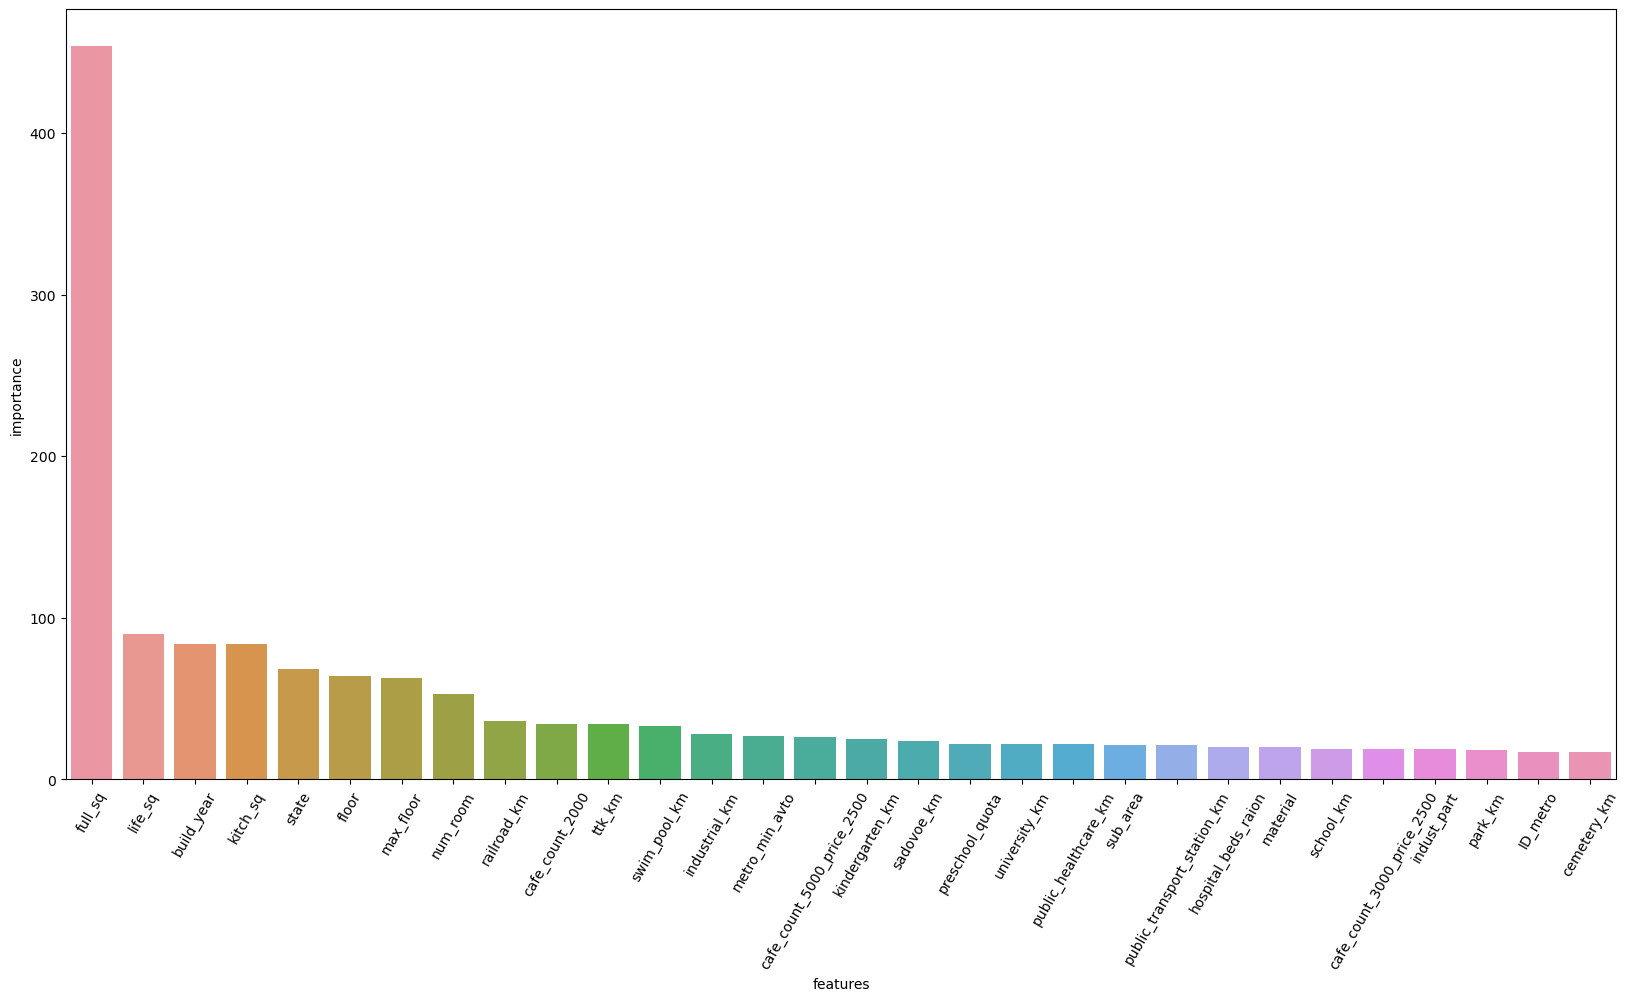

In [248]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=60)
sns.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")

We found that using 20 features produced the best result

In [249]:
# Get the top 20 features
top_features = features.head(20)['features'].values

# Update x_train and x_test to include only the top 20 features
x_train_top = x_train[top_features]
x_test_top = x_test[top_features]

# Train the model using the updated data
dtrain_top = xgb.DMatrix(x_train_top, y_train)
dtest_top = xgb.DMatrix(x_test_top)
num_boost_rounds_top = len(cv_output)
model_top = xgb.train(dict(xgb_params, silent=0), dtrain_top, num_boost_round= num_boost_rounds_top)

[20:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [250]:
id_test = sb_test.id
y_predict = model_top.predict(dtest_top)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

,id,price_doc
0,30474,5472488.5
1,30475,8638219.0
2,30476,5779878.5
3,30477,5280448.5
4,30478,5408308.0


In [251]:
output.to_csv('xgb_improved.csv', index=False)